In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score 
test = pd.read_csv('Rossmann_test.csv')
train=pd.read_csv('Rossmann_train.csv')
store=pd.read_csv('Rossmann_store.csv')

train["StateHoliday"].replace("0",0,inplace=True)

closed = train[train['Open'] == 0]['DayOfWeek']
closed=pd.DataFrame(closed, columns=['DayOfWeek'])

train = train[(train["Open"] != 0) & (train['Sales'] != 0)]

train['AvgPurchase'] = train.Sales / train.Customers
train.AvgPurchase.fillna(0, inplace=True)

train["Date"] = pd.to_datetime(train["Date"])
train.set_index("Date", inplace=True)
train["Year"] = train.index.year.astype('int64') 
train["Month"] = train.index.month.astype('int64')

def season(month):
    if month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Autumn"
    elif month in [12, 1, 2]:
        return "Winter"

train["Season"] = train["Month"].apply(season)

store_sales = train.groupby('Store')['Sales'].sum().reset_index()
sales_threshold = store_sales['Sales'].quantile(0.8)

store_sales20 = store_sales[store_sales['Sales'] >= sales_threshold]

# Filters the train dataframe based on the top 20% stores
final_train = train[train['Store'].isin(store_sales20['Store'])]

store.Promo2SinceWeek.fillna(0, inplace=True)
store.Promo2SinceYear.fillna(0, inplace=True)
store.PromoInterval.fillna(0, inplace=True)

from sklearn.impute import KNNImputer

# Create a DataFrame with the columns that need imputation
columns_to_impute = ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'CompetitionDistance']
col = store[columns_to_impute].copy() 

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Perform imputation
imputed_data = imputer.fit_transform(col)

# Create a DataFrame with the imputed data
imputed_df = pd.DataFrame(imputed_data, columns=columns_to_impute)

# Replace the missing values in the original DataFrame with the imputed values
store[columns_to_impute] = imputed_df

x = final_train.reset_index()

merged_sales = x.merge(store, how='left', on='Store')
merged_sales = merged_sales[merged_sales['Customers'] != 7388]
merged_sales.set_index('Date', inplace=True)

C:\Users\jhkan\AppData\Local\Temp\ipykernel_2892\2434102364.py:9: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train=pd.read_csv('Rossmann_train.csv')


In [13]:
merged_sales

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,AvgPurchase,Year,...,Season,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-31,4,5,13995,1498,1,1,0,1,9.342457,2015,...,Summer,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
2015-07-31,7,5,15344,1414,1,1,0,1,10.851485,2015,...,Summer,a,c,24000.0,4.0,2013.0,0,0.0,0.0,0
2015-07-31,24,5,14190,1082,1,1,0,1,13.114603,2015,...,Summer,a,c,4590.0,3.0,2000.0,1,40.0,2011.0,"Jan,Apr,Jul,Oct"
2015-07-31,25,5,14180,1586,1,1,0,1,8.940731,2015,...,Summer,c,a,430.0,4.0,2003.0,0,0.0,0.0,0
2015-07-31,27,5,13213,1263,1,1,0,1,10.461599,2015,...,Summer,a,a,60.0,1.0,2005.0,1,5.0,2011.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-01,676,2,3821,777,1,0,a,1,4.917632,2013,...,Winter,b,b,1410.0,9.0,2008.0,0,0.0,0.0,0
2013-01-01,682,2,3375,566,1,0,a,1,5.962898,2013,...,Winter,b,a,150.0,9.0,2006.0,0,0.0,0.0,0
2013-01-01,733,2,10765,2377,1,0,a,1,4.528818,2013,...,Winter,b,b,860.0,10.0,1999.0,0,0.0,0.0,0


In [2]:
merged_sales['CompetitionOpenSince_TotalMonths'] = ((2013 - merged_sales['CompetitionOpenSinceYear'])*12)+merged_sales['CompetitionOpenSinceMonth']

In [15]:
merged_sales.tail()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,AvgPurchase,Year,...,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSince_TotalMonths
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,676,2,3821,777,1,0,a,1,4.917632,2013,...,b,b,1410.0,9.0,2008.0,0,0.0,0.0,0,69.0
2013-01-01,682,2,3375,566,1,0,a,1,5.962898,2013,...,b,a,150.0,9.0,2006.0,0,0.0,0.0,0,93.0
2013-01-01,733,2,10765,2377,1,0,a,1,4.528818,2013,...,b,b,860.0,10.0,1999.0,0,0.0,0.0,0,178.0
2013-01-01,769,2,5035,1248,1,0,a,1,4.034455,2013,...,b,b,840.0,7.0,2008.2,1,48.0,2012.0,"Jan,Apr,Jul,Oct",64.6
2013-01-01,1097,2,5961,1405,1,0,a,1,4.242705,2013,...,b,b,720.0,3.0,2002.0,0,0.0,0.0,0,135.0


Created new column outlining the total months the competitors were open, using years open since data

In [16]:
print(merged_sales['Store'].value_counts())

335     942
733     942
494     942
1097    942
682     942
       ... 
539     622
108     622
903     622
342     621
909     607
Name: Store, Length: 223, dtype: int64


[Text(0.5, 1.0, 'Competition open since(months) and Sales')]

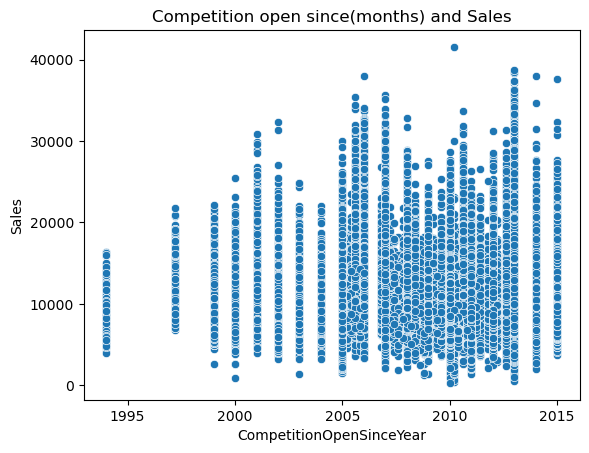

In [17]:
sns.scatterplot(x="CompetitionOpenSinceYear", y="Sales", data=merged_sales).set(title = "Competition open since(months) and Sales")

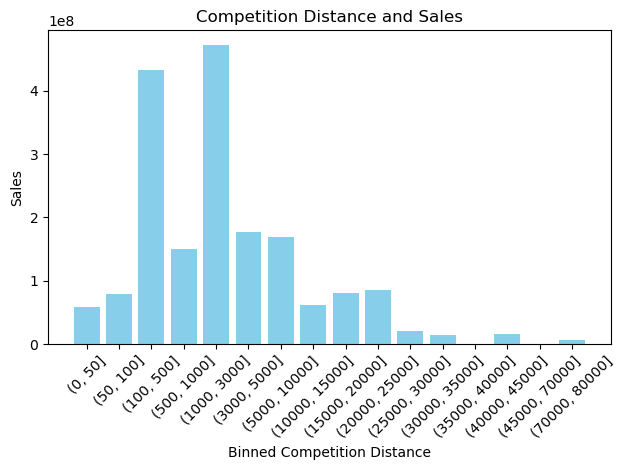

In [27]:
bins = [0,50, 100, 500, 1000, 3000 ,5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 70000, 80000]

# Create a new column with binned 'CompetitionDistance'
merged_sales['CompDis_bins'] = pd.cut(merged_sales['CompetitionDistance'], bins=bins)

# Group the data by bins and calculate the sum of 'Customers' in each bin
grouped_comp_cus = merged_sales.groupby('CompDis_bins')['Sales'].sum().reset_index()

# Create a bar graph with binned 'CompetitionDistance' on the x-axis and 'Customers' on the y-axis
plt.bar(grouped_comp_cus['CompDis_bins'].astype(str), grouped_comp_cus['Sales'], color='skyblue')

# Customize the y-axis label
plt.ylabel('Sales')

# Customize the plot
plt.xlabel('Binned Competition Distance')
plt.title('Competition Distance and Sales')

# Show the bar graph
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()  # Ensure labels fit within the figure

plt.show()

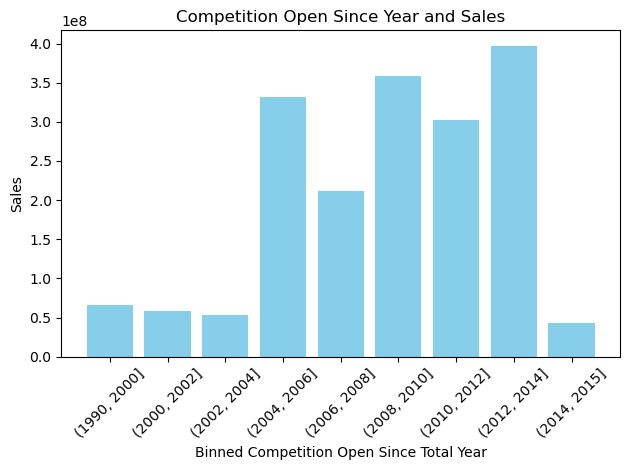

In [19]:
bins = [1990, 2000, 2002, 2004, 2006, 2008, 2010,2012,2014 ,2015]
# Create a new column with binned 'CompetitionDistance'
merged_sales['CompOpen_bins'] = pd.cut(merged_sales['CompetitionOpenSinceYear'], bins=bins)

# Group the data by bins and calculate the sum of 'Customers' in each bin
grouped_comp_cus = merged_sales.groupby('CompOpen_bins')['Sales'].sum().reset_index()

# Create a bar graph with binned 'CompetitionDistance' on the x-axis and 'Customers' on the y-axis
plt.bar(grouped_comp_cus['CompOpen_bins'].astype(str), grouped_comp_cus['Sales'], color='skyblue')

# Customize the y-axis label
plt.ylabel('Sales')

# Customize the plot
plt.xlabel('Binned Competition Open Since Total Year')
plt.title('Competition Open Since Year and Sales')

# Show the bar graph
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()  # Ensure labels fit within the figure

plt.show()

high sales for stores opened in the 2002 - 2014 year period

<Axes: xlabel='CompetitionOpenSinceYear', ylabel='Sales'>

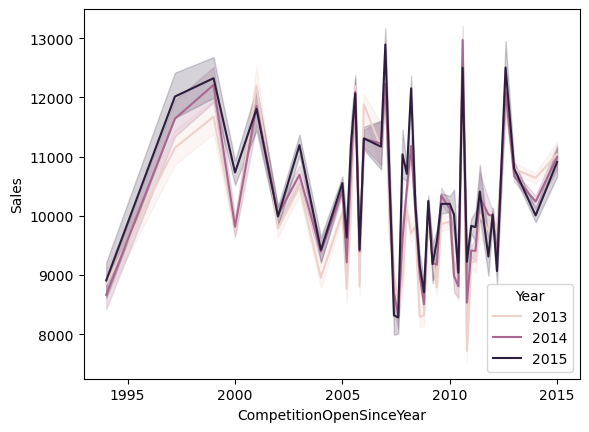

In [4]:
sns.lineplot(x="CompetitionOpenSinceYear", y="Sales", data=merged_sales, hue='Year')

In [21]:
merged_sales['CompOpen_bins'].value_counts()

(2012, 2014]    37255
(2008, 2010]    36184
(2004, 2006]    30713
(2010, 2012]    30492
(2006, 2008]    19320
(1990, 2000]     6234
(2000, 2002]     5615
(2002, 2004]     5272
(2014, 2015]     3907
Name: CompOpen_bins, dtype: int64

In [22]:
#<80 is approx half

In [23]:
effect_df = merged_sales[merged_sales['CompetitionOpenSinceYear'] < 2005]
effect_df.tail()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,AvgPurchase,Year,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSince_TotalMonths,CompDis_bins,CompOpen_bins
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,999,3,5867,502,1,0,0,1,11.687251,2013,...,15140.0,2.0,2002.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct",134.0,"(15000, 20000]","(2000, 2002]"
2013-01-02,1092,3,11054,1158,1,0,0,1,9.545769,2013,...,300.0,7.0,2000.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",163.0,"(100, 5000]","(1990, 2000]"
2013-01-02,1097,3,6688,1819,1,0,0,1,3.676745,2013,...,720.0,3.0,2002.0,0,0.0,0.0,0,135.0,"(100, 5000]","(2000, 2002]"
2013-01-01,733,2,10765,2377,1,0,a,1,4.528818,2013,...,860.0,10.0,1999.0,0,0.0,0.0,0,178.0,"(100, 5000]","(1990, 2000]"
2013-01-01,1097,2,5961,1405,1,0,a,1,4.242705,2013,...,720.0,3.0,2002.0,0,0.0,0.0,0,135.0,"(100, 5000]","(2000, 2002]"


C:\Users\jhkan\AppData\Local\Temp\ipykernel_17784\2696375585.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  effect_df['CompOpen_bins'] = pd.cut(effect_df['CompetitionOpenSinceYear'], bins=bins)


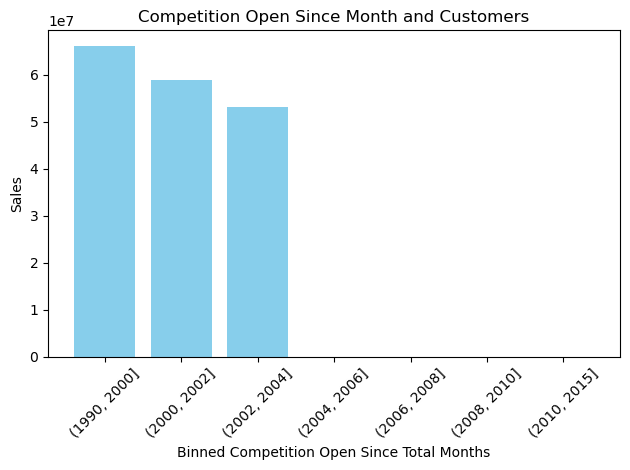

In [24]:
bins = [1990, 2000, 2002, 2004, 2006, 2008, 2010, 2015]
# Create a new column with binned 'CompetitionDistance'
effect_df['CompOpen_bins'] = pd.cut(effect_df['CompetitionOpenSinceYear'], bins=bins)

# Group the data by bins and calculate the sum of 'Customers' in each bin
grouped_comp_cus = effect_df.groupby('CompOpen_bins')['Sales'].sum().reset_index()

# Create a bar graph with binned 'CompetitionDistance' on the x-axis and 'Customers' on the y-axis
plt.bar(grouped_comp_cus['CompOpen_bins'].astype(str), grouped_comp_cus['Sales'], color='skyblue')

# Customize the y-axis label
plt.ylabel('Sales')

# Customize the plot
plt.xlabel('Binned Competition Open Since Total Months')
plt.title('Competition Open Since Month and Customers')

# Show the bar graph
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()  # Ensure labels fit within the figure

plt.show()

<Axes: xlabel='CompetitionOpenSince_TotalMonths', ylabel='Sales'>

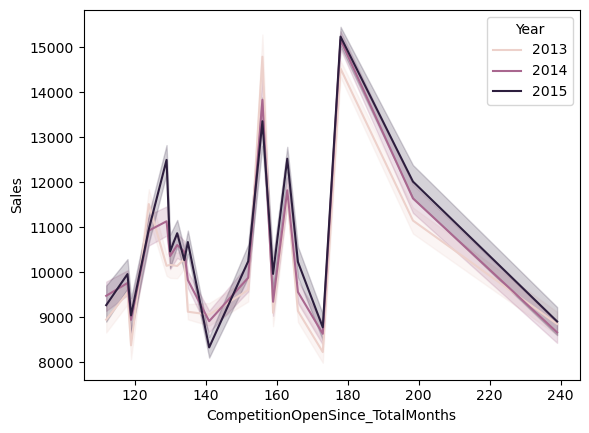

In [25]:
sns.lineplot(x="CompetitionOpenSince_TotalMonths", y="Sales", data=effect_df, hue='Year')

In [38]:
effect_df[effect_df['Sales'] > 15000]

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,AvgPurchase,Year,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSince_TotalMonths,CompOpen_bins
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-31,125,5,18227,2041,1,1,0,1,8.930426,2015,...,a,760.0,12.0,2005.0,0,0.0,0.0,0,108.0,"(100, 120]"
2015-07-31,469,5,16964,1868,1,1,0,1,9.081370,2015,...,c,710.0,9.0,2005.0,0,0.0,0.0,0,105.0,"(100, 120]"
2015-07-31,479,5,16699,1687,1,1,0,1,9.898637,2015,...,a,320.0,12.0,2005.0,1,9.0,2011.0,"Feb,May,Aug,Nov",108.0,"(100, 120]"
2015-07-31,502,5,15473,1820,1,1,0,1,8.501648,2015,...,a,220.0,2.0,2002.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct",134.0,"(120, 140]"
2015-07-31,544,5,17626,2050,1,1,0,1,8.598049,2015,...,a,250.0,12.0,2001.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",156.0,"(140, 160]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-07,726,1,18105,1642,1,1,0,0,11.026188,2013,...,c,40540.0,2.0,2002.0,0,0.0,0.0,0,134.0,"(120, 140]"
2013-01-07,809,1,17070,1201,1,1,0,0,14.213156,2013,...,a,12770.0,10.0,2000.0,0,0.0,0.0,0,166.0,"(160, 180]"
2013-01-07,846,1,15902,1262,1,1,0,0,12.600634,2013,...,c,8860.0,4.0,2004.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct",112.0,"(100, 120]"


In [51]:
# Assuming your DataFrame is named merged_sales and the 'Date' column is already in datetime format
merged_sales['CompetitionOpenSinceMonth'] = merged_sales['CompetitionOpenSinceMonth'].astype(int)
merged_sales['CompetitionOpenSinceYear'] = merged_sales['CompetitionOpenSinceYear'].astype(int)

# Create a new datetime column for the competition opening date
merged_sales['CompetitionOpeningDate'] = pd.to_datetime(merged_sales['CompetitionOpenSinceYear'].astype(str) + '-' + merged_sales['CompetitionOpenSinceMonth'].astype(str) + '-01')

# Create a new column for the time difference in months
merged_sales['MonthsSinceCompetition'] = ((merged_sales['Date'] - merged_sales['CompetitionOpeningDate']).dt.days // 30)

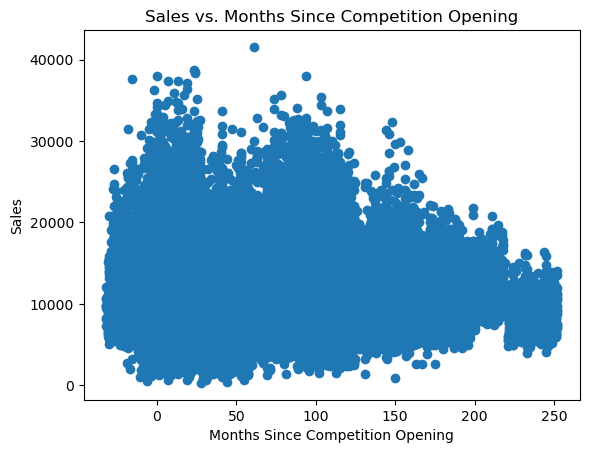

In [52]:
plt.scatter(merged_sales['MonthsSinceCompetition'], merged_sales['Sales'])
plt.xlabel('Months Since Competition Opening')
plt.ylabel('Sales')
plt.title('Sales vs. Months Since Competition Opening')
plt.show()

In [3]:
multiple_occurrences = merged_sales['Store'].value_counts()  # Counts the occurrences of each value

# Filter rows with values from 'ColumnA' that have multiple occurrences
values_with_multiple_occurrences = multiple_occurrences[multiple_occurrences > 1].index.tolist()
filtered_df = merged_sales[merged_sales['Store'].isin(values_with_multiple_occurrences)]

filtered_df.sort_values(by='Store', ascending=[True]).value_counts('Store')

Store
733     942
682     942
769     942
1097    942
335     942
       ... 
974     622
820     622
539     622
342     621
909     607
Length: 223, dtype: int64

In [22]:
store.tail()


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,AvgPurchase,Year,...,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Rolling_Mean
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,905,3,10433,1624,1,0,0,1,6.424261,2013,...,a,a,90.0,6.0,2014.0,0,0.0,0.0,0,10133.666667
2013-01-02,983,3,12003,1811,1,0,0,1,6.627830,2013,...,a,a,40.0,3.0,2014.0,1,1.0,2014.0,"Jan,Apr,Jul,Oct",11483.666667
2013-01-02,1020,3,9680,1240,1,0,0,1,7.806452,2013,...,a,a,40.0,8.0,2015.0,0,0.0,0.0,0,10705.333333
2013-01-02,1053,3,7750,962,1,0,0,1,8.056133,2013,...,a,a,1710.0,7.0,2015.0,0,0.0,0.0,0,9811.000000
2013-01-01,423,2,9643,1751,1,0,a,1,5.507139,2013,...,b,a,1270.0,5.0,2014.0,0,0.0,0.0,0,9024.333333


In [5]:
store = filtered_df[filtered_df['CompetitionOpenSinceYear'] > 2013]
store_423 = store[store['Store'] == 423];
store_878 = store[store['Store'] == 878];
store_1053 = store[store['Store'] == 1053];

In [103]:
store[store['Store'] == 423]

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,AvgPurchase,Year,...,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompOpen_bins
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-31,423,5,13331,2213,1,1,0,1,6.023949,2015,...,b,a,1270.0,5.0,2014.0,0,0.0,0.0,0,"(2010, 2015]"
2015-07-30,423,4,11101,1895,1,1,0,1,5.858047,2015,...,b,a,1270.0,5.0,2014.0,0,0.0,0.0,0,"(2010, 2015]"
2015-07-29,423,3,11418,1916,1,1,0,1,5.959290,2015,...,b,a,1270.0,5.0,2014.0,0,0.0,0.0,0,"(2010, 2015]"
2015-07-28,423,2,10633,1764,1,1,0,1,6.027778,2015,...,b,a,1270.0,5.0,2014.0,0,0.0,0.0,0,"(2010, 2015]"
2015-07-27,423,1,12469,2062,1,1,0,1,6.047042,2015,...,b,a,1270.0,5.0,2014.0,0,0.0,0.0,0,"(2010, 2015]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-05,423,6,7095,1248,1,0,0,0,5.685096,2013,...,b,a,1270.0,5.0,2014.0,0,0.0,0.0,0,"(2010, 2015]"
2013-01-04,423,5,9285,1654,1,0,0,1,5.613664,2013,...,b,a,1270.0,5.0,2014.0,0,0.0,0.0,0,"(2010, 2015]"
2013-01-03,423,4,8254,1482,1,0,0,1,5.569501,2013,...,b,a,1270.0,5.0,2014.0,0,0.0,0.0,0,"(2010, 2015]"


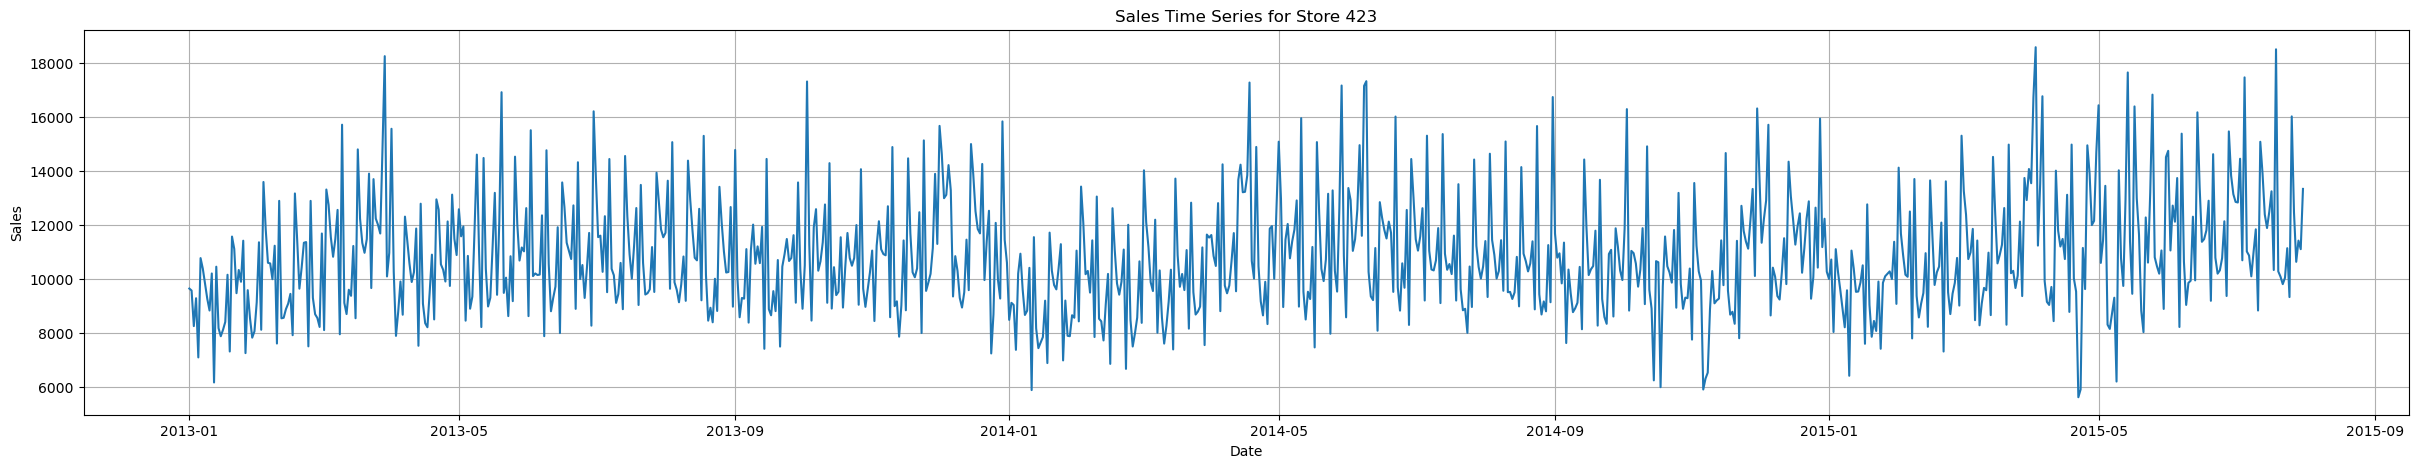

In [98]:
#competition oppened 2014
plt.figure(figsize=(30, 5))
plt.plot(store_423['Sales'])
plt.title('Sales Time Series for Store 423')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

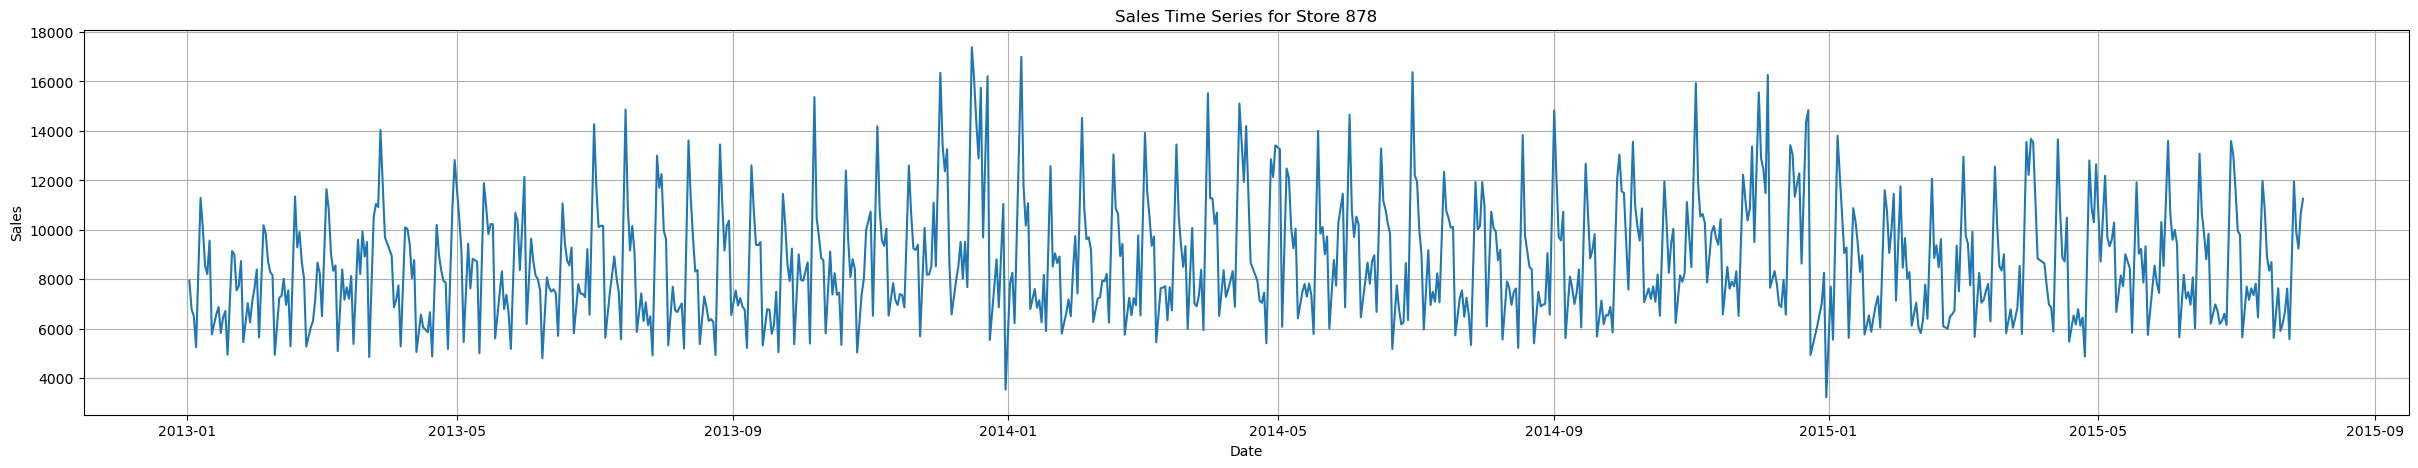

In [100]:
plt.figure(figsize=(30, 5))
plt.plot(store_878['Sales'])
plt.title('Sales Time Series for Store 878')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

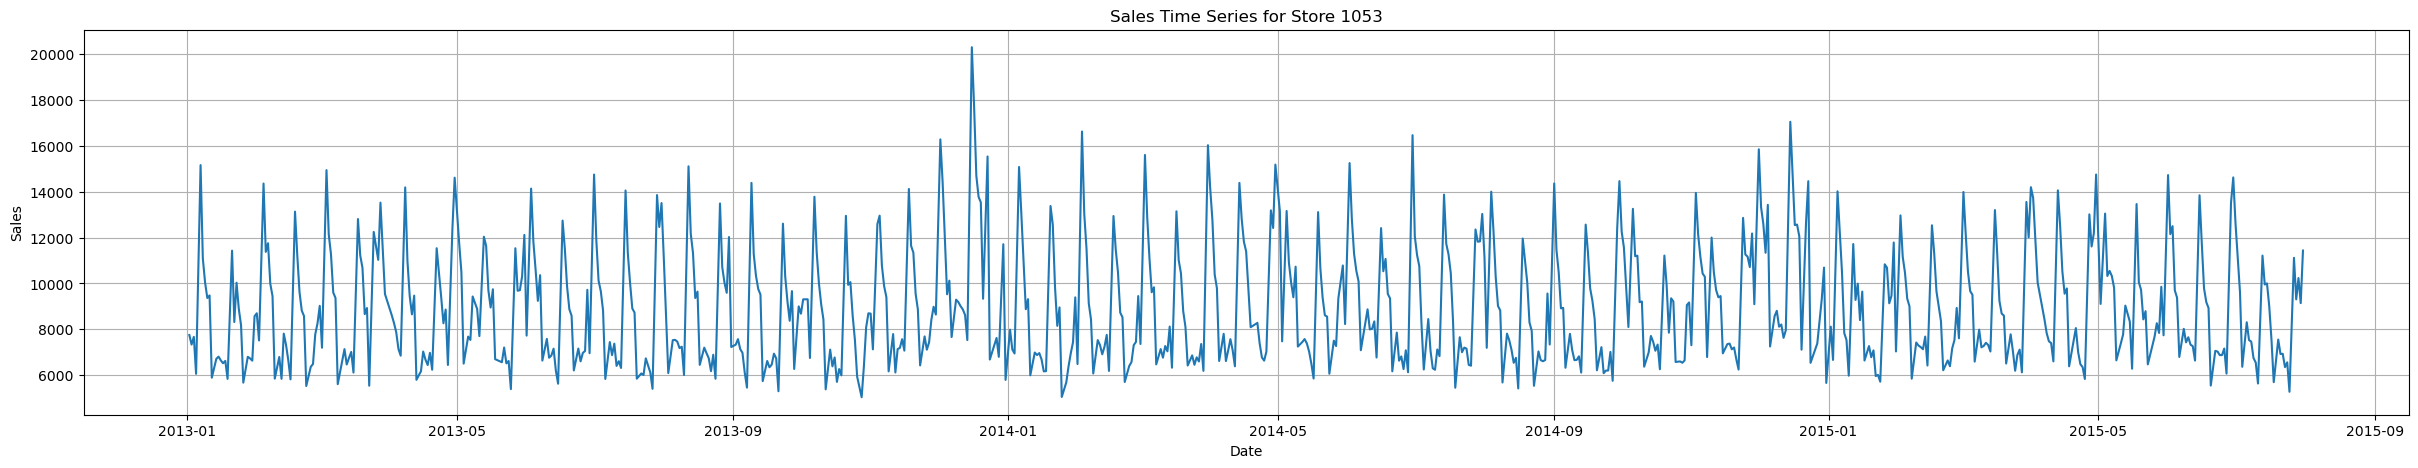

In [101]:
plt.figure(figsize=(30, 5))
plt.plot(store_1053['Sales'])
plt.title('Sales Time Series for Store 1053')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

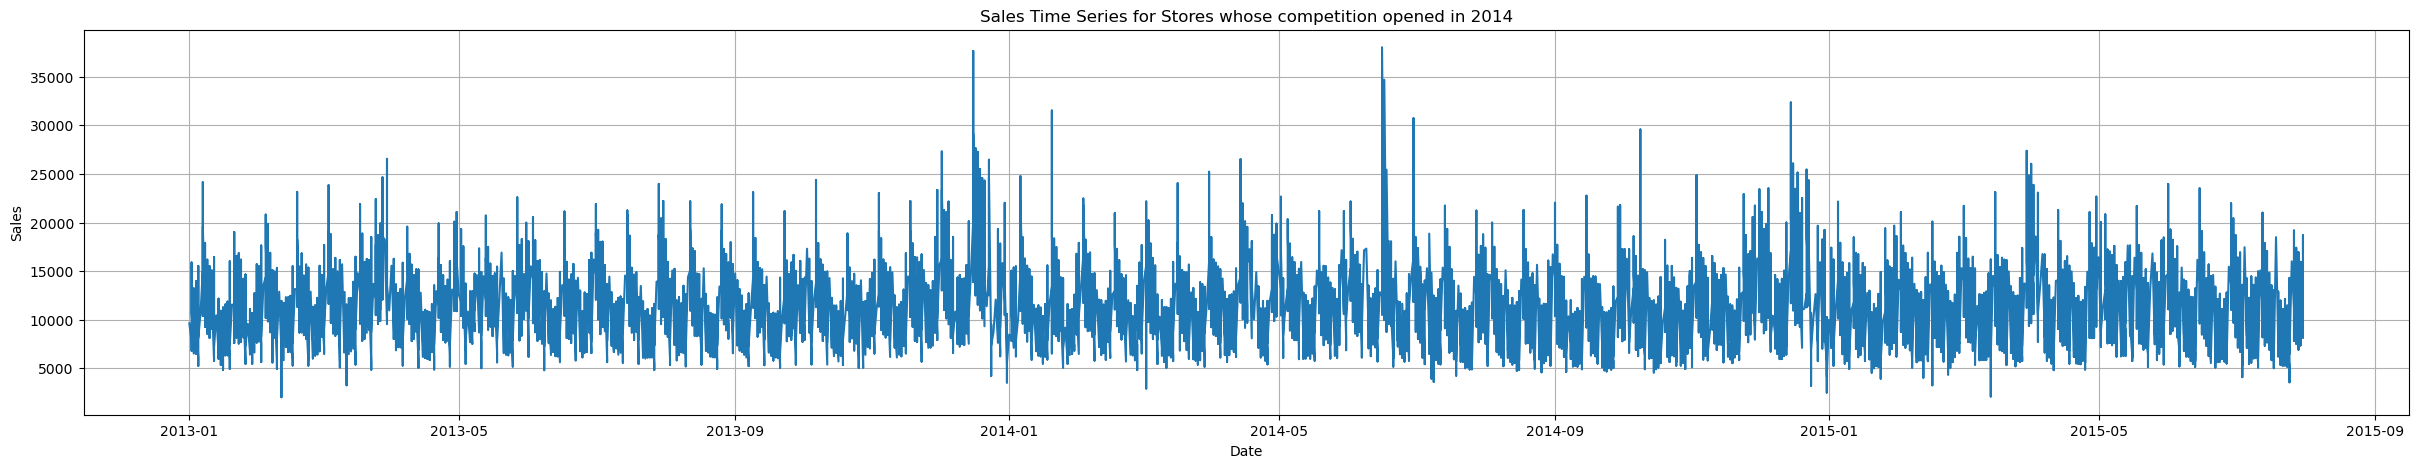

In [112]:
plt.figure(figsize=(30, 5))
plt.plot(store['Sales'])
plt.title('Sales Time Series for Stores whose competition opened in 2014')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [23]:
a = store.sort_values(by='Date')
a

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,AvgPurchase,Year,...,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Rolling_Mean
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,423,2,9643,1751,1,0,a,1,5.507139,2013,...,b,a,1270.0,5.0,2014.0,0,0.0,0.0,0,9024.333333
2013-01-02,57,3,10719,1084,1,0,0,1,9.888376,2013,...,d,c,420.0,6.0,2014.0,0,0.0,0.0,0,8445.333333
2013-01-02,84,3,12709,1592,1,0,0,1,7.983040,2013,...,a,c,11810.0,8.0,2014.0,0,0.0,0.0,0,10253.666667
2013-01-02,189,3,8287,848,1,0,0,1,9.772406,2013,...,d,a,5760.0,7.0,2014.0,0,0.0,0.0,0,10571.666667
2013-01-02,261,3,8471,760,1,0,0,1,11.146053,2013,...,d,c,15340.0,4.0,2015.0,1,39.0,2009.0,"Jan,Apr,Jul,Oct",9822.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-31,983,5,11368,1250,1,1,0,1,9.094400,2015,...,a,a,40.0,3.0,2014.0,1,1.0,2014.0,"Jan,Apr,Jul,Oct",11145.333333
2015-07-31,1020,5,10734,1138,1,1,0,1,9.432337,2015,...,a,a,40.0,8.0,2015.0,0,0.0,0.0,0,10086.333333
2015-07-31,1053,5,11436,1088,1,1,0,1,10.511029,2015,...,a,a,1710.0,7.0,2015.0,0,0.0,0.0,0,11179.333333


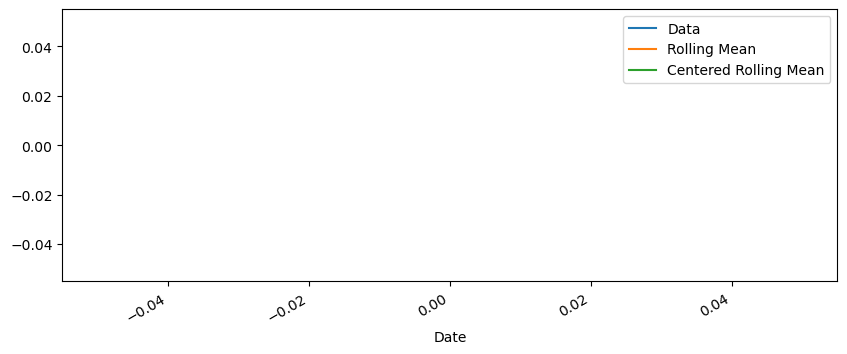

In [19]:
start = pd.Timestamp("2013-01-01")
end = pd.Timestamp("2015-07-31")

store1 = store.loc[start:end, "Sales"]

rolling_mean = store1.rolling('4H').mean()

centered_rolling_mean = store1.rolling(16, center=True).mean()

store1.plot.line(label='Data', figsize=(10, 4))
rolling_mean.plot.line(label='Rolling Mean')
centered_rolling_mean.plot.line(label='Centered Rolling Mean')

plt.legend();

In [21]:
rolling_mean = store['Sales'].rolling(window=3).mean()

# Add the rolling mean as a new column to the DataFrame
store['Rolling_Mean'] = rolling_mean

# Plot the original data and the rolling mean
plt.figure(figsize=(10, 6))
plt.plot(store['Date'], store['Sales'], label='Original Data', marker='o', linestyle='-')
plt.plot(store['Date'], store['Rolling_Mean'], label='Rolling Mean (window=3)', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original Data and Rolling Mean')
plt.legend()
plt.grid(True)

plt.show()

C:\Users\jhkan\AppData\Local\Temp\ipykernel_12796\3317174408.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store['Rolling_Mean'] = rolling_mean


KeyError: "None of ['Date'] are in the columns"